# Clustering and K-Means review
---

In [0]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn import metrics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.8MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1peWEdB7HbjCoJZyHQA-FC8kJyIPYaKLO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('aggregation.csv')

In [0]:
# Let's read in the x and y columns as the dataframe df
df = pd.read_csv('aggregation.csv',usecols=["x", "y"])
df.head()

,x,y
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


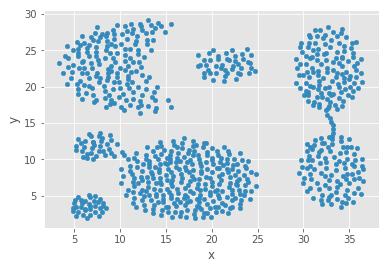

In [0]:
# Plot the scatter plot for the dataframe
df.plot(kind="scatter",x="x",y="y")

In [0]:
#What would be a good number of K-means clusters to fit the model?
model = KMeans(n_clusters=7).fit(df)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [0]:
# Check out model params
predicted = model.labels_
centroids = model.cluster_centers_

print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 9.29464286 22.95267857]
 [32.69453125 22.13789062]
 [20.69656489  7.02709924]
 [ 7.32012987  7.74805195]
 [21.28723404 22.99893617]
 [33.14278846  8.79375   ]
 [14.66165414  7.2556391 ]]


In [0]:
# attach the predicted cluster labels to the original points
df['predicted'] = predicted
df.head()

,x,y,predicted
0,15.55,28.65,4
1,14.90,27.55,0
2,14.45,28.35,0
3,14.15,28.80,0
4,13.75,28.05,0


### Visually verifying cluster labels

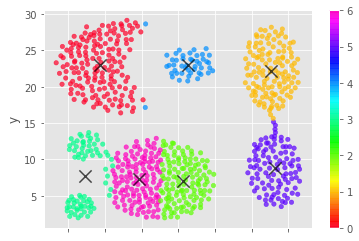

In [0]:
## Plot the clusters overlapped with centroids
plt.figure(figsize=(7,7))

df.plot(x="x", y="y", kind="scatter", c=df['predicted'], colormap='gist_rainbow', alpha=.7)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='x', s=150, alpha=.7, c='black')

## Metrics: inertia and the silhouette coefficient
---

In [0]:
#Evaluate and print out inertia and Silhouette values
inertia = model.inertia_
print ('inertia: ',inertia)
print ('Silhouette Score:', metrics.silhouette_score(df.drop("predicted", axis = 1), df.predicted, metric='euclidean'))

inertia:  10999.755156807054
Silhouette Score: 0.4810059524370871


### Programatically Inspecting $K$

We want to see how either inertia or silhouette score changes based on $K$.

We will write a basic process for exploring inertia and silhouette, that you can feel free to adapt to any other ML process you might write in Sklearn for doing custom scoring.

> Visually inspecting your clusters is vastly superior to relying on programatic parameter searching for an ideal cluster for most data.  You can also invent your own evalutation metrics other than inertia or silhoette.  The world is also bigger than K-Means when it comes to cluster applications.  It's a great first stop in your journey of clustering.

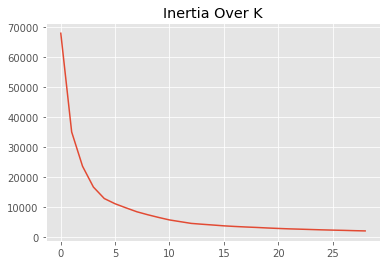

In [0]:
values = range(2,31)
scores = []
df = pd.read_csv('aggregation.csv',usecols=["x", "y"])
for value in values:        
    model = KMeans(n_clusters = value)
    model.fit(df)
    inertia = model.inertia_
    scores.append(inertia)

eval_scores = pd.Series(scores)
eval_scores.plot( title="Inertia Over K")

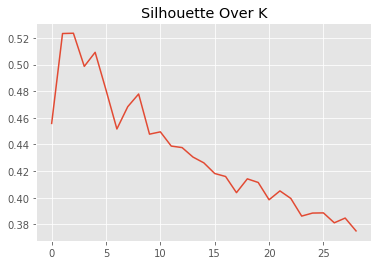

In [0]:
values = range(2,31)
scores = []
df = pd.read_csv('aggregation.csv',usecols=["x", "y"])
for value in values:        
    model = KMeans(n_clusters = value)
    model.fit(df)
    score = silhouette_score(df, model.labels_)
    scores.append(score)
eval_scores = pd.Series(scores)
eval_scores.plot( title="Silhouette Over K")